# ML Project

## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import combinations
import collections
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## 2. Data Preprocessing

In [2]:
heart_2020_cleaned_df = pd.read_csv("data/heart_2020_cleaned.csv")
print("\n Heart 2020 Cleaned \n")
print(heart_2020_cleaned_df.info())


 Heart 2020 Cleaned 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 1

In [3]:
print("\n NA Values \n")
print(heart_2020_cleaned_df.isna().sum())


 NA Values 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [4]:
heart_2020_cleaned_df.head().T

,0,1,2,3,4
HeartDisease,No,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,Yes,No,Yes,No,No
AlcoholDrinking,No,No,No,No,No
Stroke,No,Yes,No,No,No
PhysicalHealth,3.0,0.0,20.0,0.0,28.0
MentalHealth,30.0,0.0,30.0,0.0,0.0
DiffWalking,No,No,No,No,Yes
Sex,Female,Female,Male,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44


In [5]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = heart_2020_cleaned_df.copy()
df_tmp = pd.get_dummies(df_tmp, columns=['Sex', 'Race']) # one hot encoding for sex and race 
df_tmp.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Sex_Female', 'Sex_Male',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')

### 2.1 Converting strings (object) to categories

In [6]:
print("Labels for which data is string:")
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Labels for which data is string:
HeartDisease
Smoking
AlcoholDrinking
Stroke
DiffWalking
AgeCategory
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


In [7]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   HeartDisease                         319795 non-null  category
 1   BMI                                  319795 non-null  float64 
 2   Smoking                              319795 non-null  category
 3   AlcoholDrinking                      319795 non-null  category
 4   Stroke                               319795 non-null  category
 5   PhysicalHealth                       319795 non-null  float64 
 6   MentalHealth                         319795 non-null  float64 
 7   DiffWalking                          319795 non-null  category
 8   AgeCategory                          319795 non-null  category
 9   Diabetic                             319795 non-null  category
 10  PhysicalActivity                     319795 non-null  category
 11  

In [8]:
df_tmp.AgeCategory.cat.categories

Index(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype='object')

In [9]:
df_tmp.GenHealth.cat.codes

0         4
1         4
2         1
3         2
4         4
         ..
319790    1
319791    4
319792    2
319793    2
319794    2
Length: 319795, dtype: int8

#### All of our data is categorical and thus we can now turn the categories into numbers.

### 2.2 Saving Processed Data

In [10]:
# Saving
df_tmp.to_csv("data/heart_2020_cleaned_preprocessed.csv", index=False)

In [11]:
# Importing
df_tmp = pd.read_csv("data/heart_2020_cleaned_preprocessed.csv")
df_tmp.head().T

,0,1,2,3,4
HeartDisease,No,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,Yes,No,Yes,No,No
AlcoholDrinking,No,No,No,No,No
Stroke,No,Yes,No,No,No
PhysicalHealth,3.0,0.0,20.0,0.0,28.0
MentalHealth,30.0,0.0,30.0,0.0,0.0
DiffWalking,No,No,No,No,Yes
AgeCategory,55-59,80 or older,65-69,75-79,40-44
Diabetic,Yes,No,Yes,No,No


### 2.3 Turning categorical values to numbers

In [12]:
# Check columns which *aren't* numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HeartDisease
Smoking
AlcoholDrinking
Stroke
DiffWalking
AgeCategory
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


In [13]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes

In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int8   
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int8   
 3   AlcoholDrinking                      319795 non-null  int8   
 4   Stroke                               319795 non-null  int8   
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int8   
 8   AgeCategory                          319795 non-null  int8   
 9   Diabetic                             319795 non-null  int8   
 10  PhysicalActivity                     319795 non-null  int8   
 11  GenHealth    

In [15]:
df_tmp.head().T

,0,1,2,3,4
HeartDisease,0.0,0.00,0.00,0.00,0.00
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,1.0,0.00,1.00,0.00,0.00
AlcoholDrinking,0.0,0.00,0.00,0.00,0.00
Stroke,0.0,1.00,0.00,0.00,0.00
PhysicalHealth,3.0,0.00,20.00,0.00,28.00
MentalHealth,30.0,0.00,30.00,0.00,0.00
DiffWalking,0.0,0.00,0.00,0.00,1.00
AgeCategory,7.0,12.00,9.00,11.00,4.00
Diabetic,2.0,0.00,2.00,0.00,0.00


In [16]:
from sklearn.preprocessing import MinMaxScaler
# create the scaler object
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(df_tmp)

# create a new DataFrame with the normalized data
df_normalized = pd.DataFrame(normalized_data, columns=df_tmp.columns)

print(df_normalized.head())

   HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0           0.0  0.055294      1.0              0.0     0.0        0.100000   
1           0.0  0.100447      0.0              0.0     1.0        0.000000   
2           0.0  0.175782      1.0              0.0     0.0        0.666667   
3           0.0  0.147169      0.0              0.0     0.0        0.000000   
4           0.0  0.141132      0.0              0.0     0.0        0.933333   

   MentalHealth  DiffWalking  AgeCategory  Diabetic  ...  KidneyDisease  \
0           1.0          0.0     0.583333  0.666667  ...            0.0   
1           0.0          0.0     1.000000  0.000000  ...            0.0   
2           1.0          0.0     0.750000  0.666667  ...            0.0   
3           0.0          0.0     0.916667  0.000000  ...            0.0   
4           0.0          1.0     0.333333  0.000000  ...            0.0   

   SkinCancer  Sex_Female  Sex_Male  Race_American Indian/Alaskan Native  

### 2.4 Train - Test Split

In [17]:
# Split data into X and y
# Split data into X and y
X = df_normalized.drop("HeartDisease", axis=1)

y = df_normalized["HeartDisease"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.583333,0.666667,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,1.000000,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,0.750000,0.666667,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.916667,0.000000,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.333333,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HeartDisease, dtype: float64

In [21]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
93582,0.341181,1.0,0.0,0.0,0.000000,0.166667,0.0,0.333333,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
261054,0.196426,0.0,0.0,0.0,0.000000,0.000000,0.0,0.833333,0.666667,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
213766,0.268019,1.0,0.0,0.0,0.233333,0.000000,1.0,0.333333,0.333333,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
198734,0.279730,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29495,0.239889,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
y_train.head()

93582     0.0
261054    0.0
213766    0.0
198734    0.0
29495     0.0
Name: HeartDisease, dtype: float64

## 3. Exploratory Data Analysis

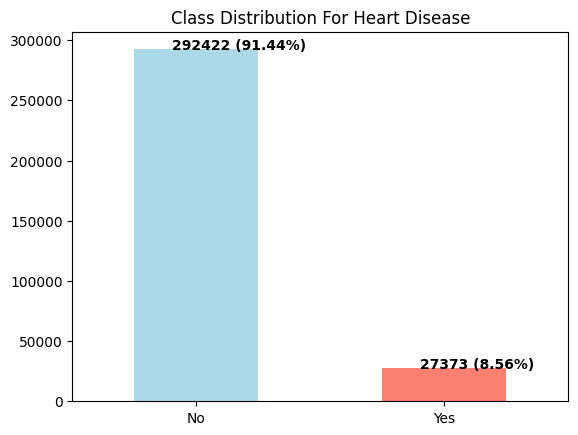

In [36]:
counts = heart_2020_cleaned_df["HeartDisease"].value_counts()
percentage = round(counts / counts.sum() * 100, 2)

ax = counts.plot(kind="bar", color=["lightblue", "salmon"])
plt.title("Class Distribution For Heart Disease")
plt.xticks(rotation=0)

for i, v in enumerate(counts):
    ax.text(i - 0.1, v + 10, f"{v} ({percentage[i]}%)", color="black", fontweight="bold")

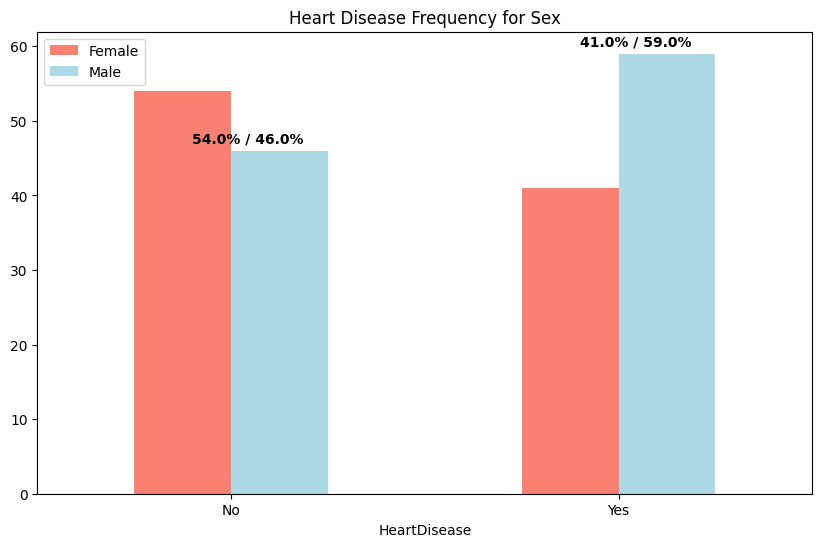

In [41]:
ct = pd.crosstab(heart_2020_cleaned_df.HeartDisease, heart_2020_cleaned_df.Sex, normalize="index")
ct = ct.round(2) * 100

ax = ct.plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

for i, v in enumerate(ct.values):
    ax.text(i - 0.1, v[1] + 1, f"{v[0]}% / {v[1]}%", color="black", fontweight="bold")

### Correlation

In [26]:
df_normalized.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.233432,0.168553,...,0.145197,0.093317,-0.070040,0.070040,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,-0.004744,0.202472,...,0.050768,-0.033644,-0.026940,0.026940,0.026347,-0.078643,0.080672,0.023750,0.012535,-0.049060
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.128331,0.053847,...,0.034920,0.033977,-0.085052,0.085052,0.035667,-0.060308,-0.038249,-0.066873,0.016205,0.072367
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.059528,-0.057372,...,-0.028280,-0.005702,-0.004200,0.004200,-0.004243,-0.022275,-0.025980,-0.015554,0.005455,0.033342
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.137822,0.101518,...,0.091167,0.048116,0.003091,-0.003091,0.014357,-0.016060,0.024819,-0.025823,0.005743,0.001154
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.110763,0.151361,...,0.142197,0.041700,0.040904,-0.040904,0.022955,-0.035229,0.011371,-0.005571,0.016102,-0.003968
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.155506,0.032945,...,0.037281,-0.033412,0.100058,-0.100058,0.018394,-0.023113,0.010944,0.011167,0.031385,-0.024489
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.243263,0.205502,...,0.153064,0.064840,0.068860,-0.068860,0.025205,-0.038830,0.039615,-0.008214,0.008483,-0.015516
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,1.000000,0.193745,...,0.123190,0.263537,0.067478,-0.067478,-0.025190,-0.083885,-0.034980,-0.162338,-0.061239,0.193823
Diabetic,0.168553,0.202472,0.053847,-0.057372,0.101518,0.151361,0.032945,0.205502,0.193745,1.000000,...,0.142917,0.032523,0.013456,-0.013456,0.027615,-0.006388,0.053607,0.011321,0.010988,-0.050822


#### If the two variables tend to increase and decrease together, the correlation value is positive. If one variable increases while the other variable decreases, the correlation value is negative.

(24.5, -0.5)

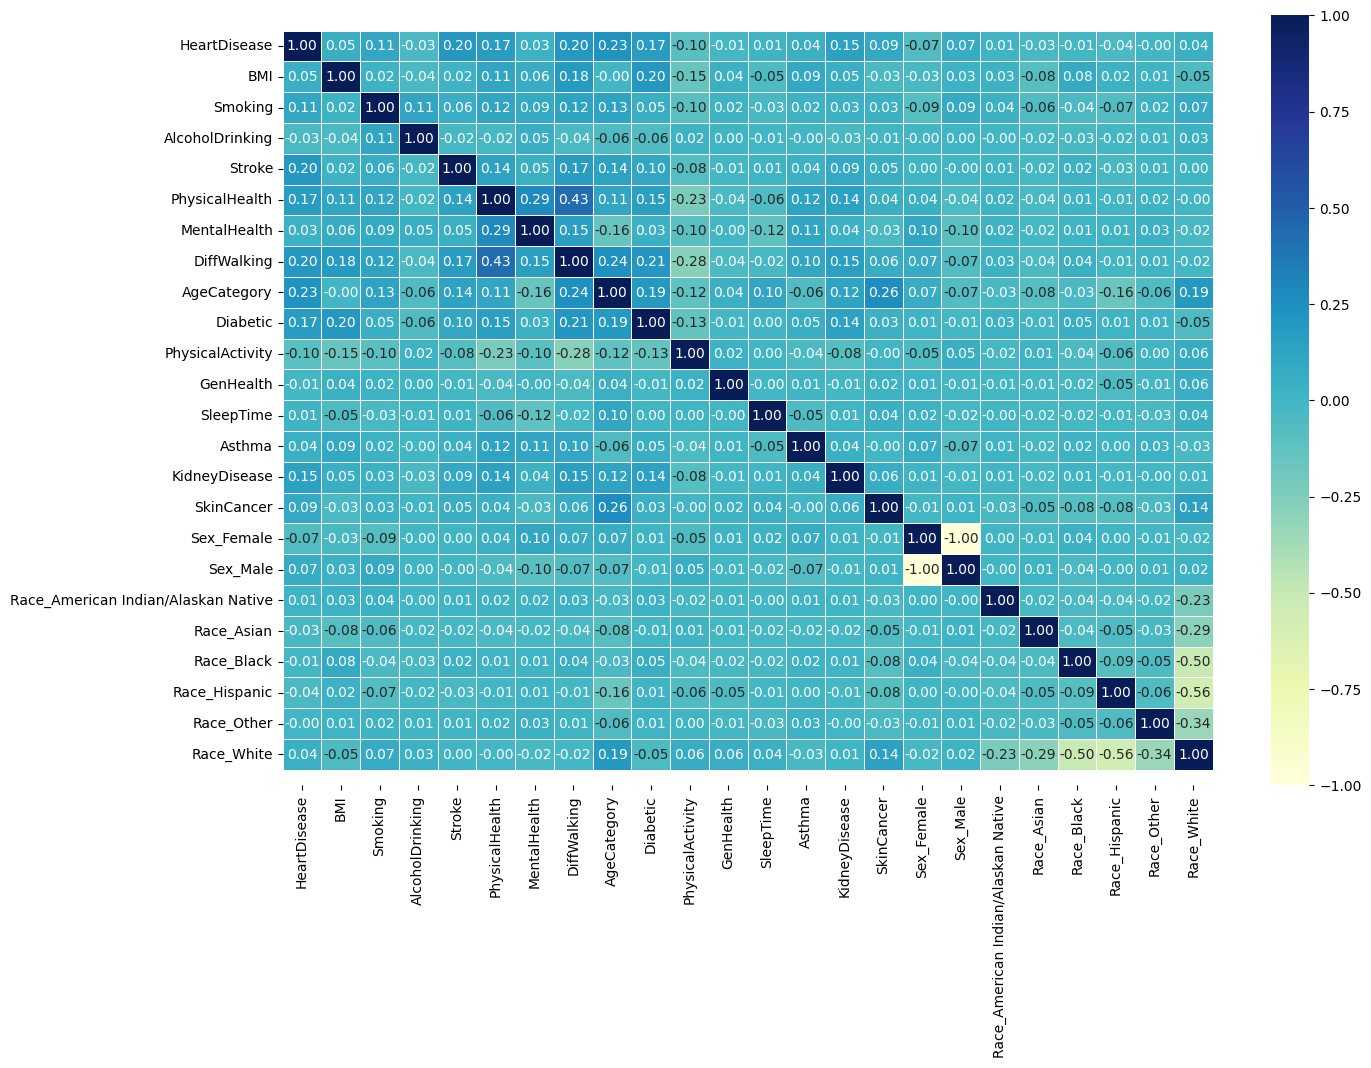

In [27]:
corr_matrix = df_tmp.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Analysing Age Category, Diff Walking, Stroke, PhysicalHealth and Diabetic as they have highest values

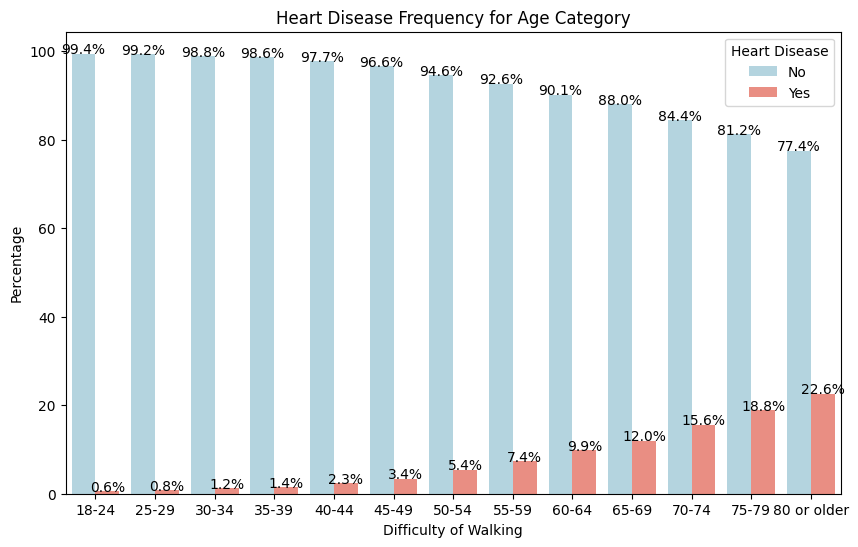

In [28]:
percentages = heart_2020_cleaned_df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AgeCategory', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'])
plt.title("Heart Disease Frequency for Age Category")
plt.xlabel("Difficulty of Walking")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

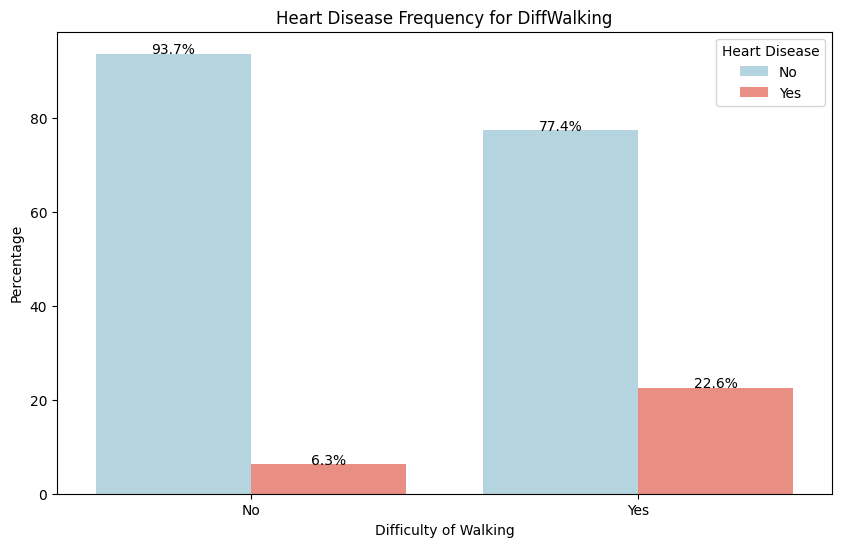

In [29]:
percentages = heart_2020_cleaned_df.groupby('DiffWalking')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='DiffWalking', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'])
plt.title("Heart Disease Frequency for DiffWalking")
plt.xlabel("Difficulty of Walking")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')
    
plt.show()

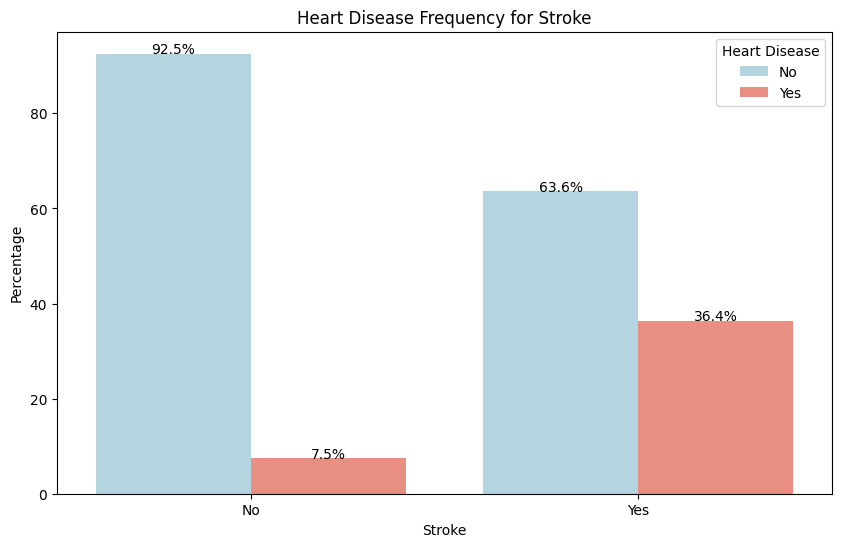

In [30]:
percentages = heart_2020_cleaned_df.groupby('Stroke')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Stroke', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'])
plt.title("Heart Disease Frequency for Stroke")
plt.xlabel("Stroke")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

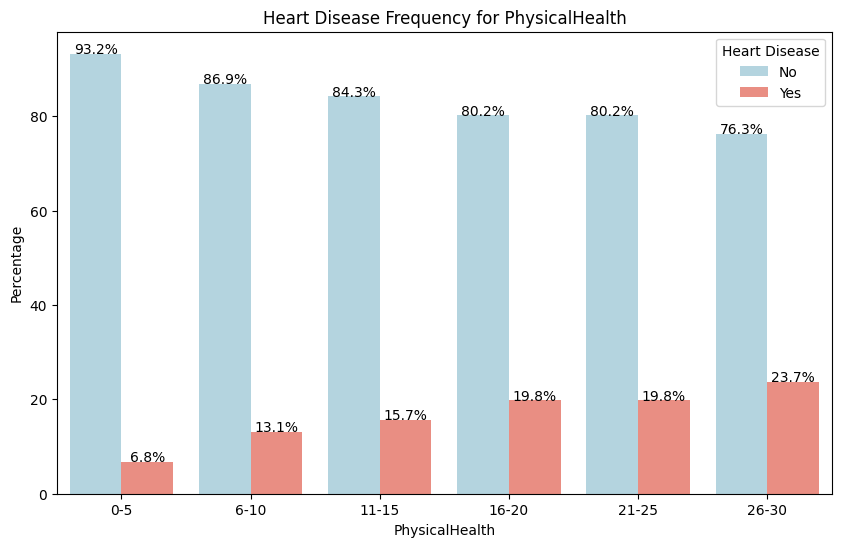

In [31]:
PhysicalHealth_categories = {
    0.0: '0-5',
    1.0: '0-5',
    2.0: '0-5',
    3.0: '0-5',
    4.0: '0-5',
    5.0: '0-5',
    6.0: '6-10',
    7.0: '6-10',
    8.0: '6-10',
    9.0: '6-10',
    10.0: '6-10',
    11.0: '11-15',
    12.0: '11-15',
    13.0: '11-15',
    14.0: '11-15',
    15.0: '11-15',
    16.0: '16-20',
    17.0: '16-20',
    18.0: '16-20',
    19.0: '16-20',
    20.0: '16-20',
    21.0: '21-25',
    22.0: '21-25',
    23.0: '21-25',
    24.0: '21-25',
    25.0: '21-25',
    26.0: '26-30',
    27.0: '26-30',
    28.0: '26-30',
    29.0: '26-30',
    30.0: '26-30'
}

order = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

heart_2020_cleaned_df['PhysicalHealthCategory'] = heart_2020_cleaned_df['PhysicalHealth'].map(PhysicalHealth_categories)

percentages = heart_2020_cleaned_df.groupby('PhysicalHealthCategory')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='PhysicalHealthCategory', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'], order=order)
plt.title("Heart Disease Frequency for PhysicalHealth")
plt.xlabel("PhysicalHealth")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')


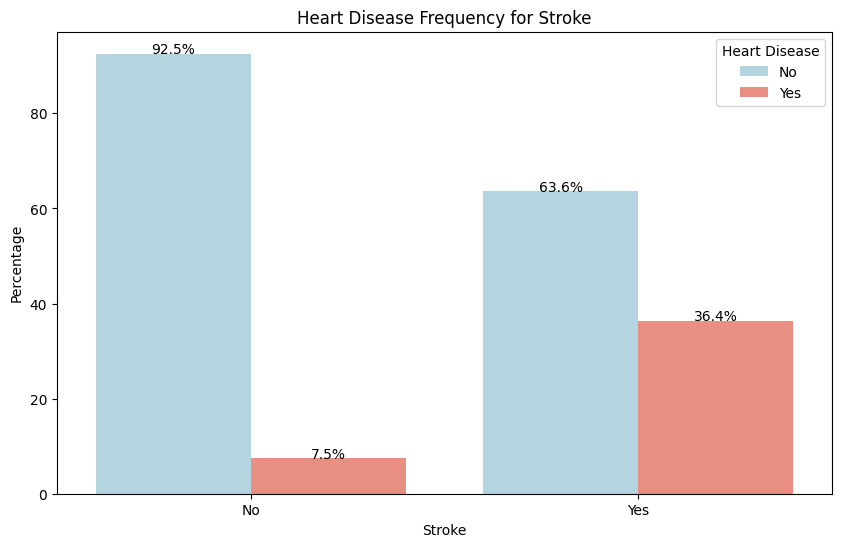

In [32]:
percentages = heart_2020_cleaned_df.groupby('Stroke')['HeartDisease'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Stroke', y='Percentage', hue='HeartDisease', data=percentages, palette=['lightblue', 'salmon'])
plt.title("Heart Disease Frequency for Stroke")
plt.xlabel("Stroke")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", loc='upper right')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

## 4. Trying out sample model

In [33]:
# Change max samples in RandomForestRegressor
model = LogisticRegression(n_jobs=-1, max_iter=130)
model.fit(X_train, y_train)

LogisticRegression(max_iter=130, n_jobs=-1)

In [34]:
model.score(X_test, y_test)

0.9140699510623993